In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define dataset paths
train_data_dir = '/Users/sidhanthmantena/Desktop/fungvschick/train'
validation_data_dir = '/Users/sidhanthmantena/Desktop/fungvschick/val'
test_data_dir = '/Users/sidhanthmantena/Desktop/fungvschick/test'

# Define image size and batch size
image_size = (224, 224)
batch_size = 32


In [10]:
# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 182 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [11]:
# Create and compile a pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Calculate the number of steps per epoch and validation steps
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# Train the model
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=epochs
)


Epoch 1/10


2023-09-28 09:43:45.731101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 1.6239 - accuracy: 0.5165

2023-09-28 09:43:56.396636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 21s 3s/step - loss: 1.6239 - accuracy: 0.5165 - val_loss: 0.8076 - val_accuracy: 0.5152
Epoch 2/10
6/6 [==============================] - 1s 200ms/step - loss: 1.0120 - accuracy: 0.5495 - val_loss: 0.9403 - val_accuracy: 0.4848
Epoch 3/10
6/6 [==============================] - 1s 197ms/step - loss: 0.8555 - accuracy: 0.4725 - val_loss: 0.9066 - val_accuracy: 0.5152
Epoch 4/10
6/6 [==============================] - 1s 199ms/step - loss: 0.7056 - accuracy: 0.5385 - val_loss: 0.7352 - val_accuracy: 0.4848
Epoch 5/10
6/6 [==============================] - 1s 198ms/step - loss: 0.6747 - accuracy: 0.6044 - val_loss: 0.7292 - val_accuracy: 0.4545
Epoch 6/10
6/6 [==============================] - 1s 200ms/step - loss: 0.7029 - accuracy: 0.5989 - val_loss: 0.7561 - val_accuracy: 0.4545
Epoch 7/10
6/6 [==============================] - 1s 196ms/step - loss: 0.7275 - accuracy: 0.4615 - val_loss: 0.8945 - val_accuracy: 0.5152
Epoch 8/10
6/6 [=================

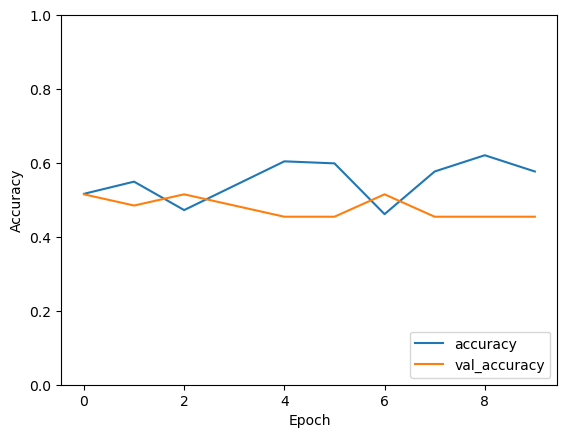

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Evaluate the model on the test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
